#**Importando os dados:**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')

In [4]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

**Retirei algumas outliers, pois alguns dados estão desconexos, exemplo, veículos de 11 milhões de Euros, 99 milhões de Euros, preço abaixo dos 10 Euros, etc.**

In [6]:
df = df[df["price"] > 10]
df = df[df["price"]< 30000]

In [7]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


**Vamos retirar algumas colunas, algumas delas contém 2 tipos de amostras, sendo que um dos tipos só tem 3 amostras, não será válido, por exemplo, a "seller" é dividida em privada e comercial, só existe 3 amostras como comercial. e 371.525 privadas.**

In [8]:
df.drop(columns=["name", "seller", "offerType", "nrOfPictures", "dateCreated", "postalCode"], inplace=True)

In [9]:
df

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen
0,2016-03-24 11:52:17,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-24 12:45:21


In [10]:
df.isna().sum()

dateCrawled                0
price                      0
abtest                     0
vehicleType            33433
yearOfRegistration         0
gearbox                17048
powerPS                    0
model                  17572
kilometer                  0
monthOfRegistration        0
fuelType               29175
brand                      0
notRepairedDamage      65722
lastSeen                   0
dtype: int64

**Vamos transformar as colunas que contém datas para dataTime que são os tipos de dados para datas.**

In [11]:
df["dateCrawled"] = pd.to_datetime(df["dateCrawled"])
df["dateCrawled"].head()

0   2016-03-24 11:52:17
1   2016-03-24 10:58:45
2   2016-03-14 12:52:21
3   2016-03-17 16:54:04
4   2016-03-31 17:25:20
Name: dateCrawled, dtype: datetime64[ns]

In [12]:
df["lastSeen"] = pd.to_datetime(df["lastSeen"])
df["lastSeen"].head()

0   2016-04-07 03:16:57
1   2016-04-07 01:46:50
2   2016-04-05 12:47:46
3   2016-03-17 17:40:17
4   2016-04-06 10:17:21
Name: lastSeen, dtype: datetime64[ns]

Excluindo os valores nulos, são poucos em relação ao número total de dados, não farão falta.

In [13]:
df.dropna(inplace=True)

In [14]:
df

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen
3,2016-03-17 16:54:04,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-05 18:18:39
10,2016-03-26 19:54:18,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-04-06 10:45:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,2016-03-19 19:53:49,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19 20:44:43
371521,2016-03-27 20:36:20,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-29 10:17:23
371524,2016-03-05 19:56:21,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-04-07 07:15:26


**O "TimedeltaProperties" não tem atributos de ".day", entãoo vamos transformar em string para depois fazer o slice:**

In [15]:
df.reset_index(inplace=True)
lista_tempo = []
for d in range(len(df)):
  tempo = df["lastSeen"][d] - df["dateCrawled"][d]
  lista_tempo.append(tempo)
df["dayWebsite"] = lista_tempo
df["dayWebsite"]  = df["dayWebsite"].apply(lambda x: str(x)[0])
df.drop(columns=["dateCrawled", "lastSeen"], inplace=True)
df.sort_values(by="dayWebsite", inplace=True)
df.drop(columns="index", inplace=True)
df

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dayWebsite
0,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,0
107379,3999,test,cabrio,1991,manuell,98,golf,150000,3,benzin,volkswagen,nein,0
107381,300,control,kleinwagen,2001,manuell,60,ka,125000,9,benzin,ford,nein,0
107388,2350,control,kleinwagen,2005,manuell,150,fiesta,150000,6,benzin,ford,ja,0
107390,6989,control,kombi,2008,automatik,190,e_klasse,150000,2,diesel,mercedes_benz,nein,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199251,5900,control,bus,2002,manuell,116,galaxy,150000,12,diesel,ford,nein,9
97325,6300,control,cabrio,2004,manuell,166,spider,100000,5,benzin,alfa_romeo,nein,9
67319,8600,test,kleinwagen,2007,manuell,150,polo,90000,11,benzin,volkswagen,nein,9
93210,6500,control,limousine,2012,manuell,86,i_reihe,60000,12,benzin,hyundai,nein,9


#**XGBoost Regressor**

In [ ]:
#Separando o que é features e target:
X = df.drop(columns="price")
y = df["price"]

# Dividindo em dados de teste e dados de treino, peguei 20% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Iniciando a construção da Pipeline:
# ==========================================================
#Primeiro vamos tratar as features numéricas. Tratando os valores nulos (NaN) e escalonando já que a variância entre as features é grande.
pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                                ("std", StandardScaler())])

features_num = X_train.select_dtypes(include=np.number).columns.tolist()
# ==========================================================

pipe_features_oe = Pipeline([("input_cat_oe", SimpleImputer(strategy="constant", fill_value="unknown")),
                             ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

features_oe = ["vehicleType", "model", "fuelType", "brand"]

# ==========================================================
pipe_features_ohe = Pipeline([("input_cat_ohe", SimpleImputer(strategy="constant", fill_value="unknown")),
                                ("OneHot", OneHotEncoder(handle_unknown='ignore'))])

features_ohe = ["abtest", "gearbox", "notRepairedDamage"]

# ==========================================================
# Pré-processador => Pegando as pipelines anteriores e unindo-as.
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_cat_oe", pipe_features_oe, features_oe),
                                     ("transf_cat_ohe", pipe_features_ohe, features_ohe)])

# ==========================================================
# Pipeline final, usando o pré-processador e o estimador que queremos utilizar, neste caso o XGBoost para regressão.
pipe_xgbr = Pipeline([("pre_processador", pre_processador),
                        ("xgbr", XGBRegressor(eval_metric='logloss', random_state=42))])

# ==========================================================
#Vamos dividir em splits para ter mais variedade no processamento dos dados.
splitter = KFold(n_splits=5, random_state=42, shuffle=True)

#Montando a grade de parâmetros do estimador (XGBoost)
params_grid_xgbr = {"xgbr__n_estimators": [1000, 5000],
                      "xgbr__max_depth": [2, 3],
                      "xgbr__learning_rate": [0.01, 0.001]}


#Motando a grade geral de parâmetros.
auto_grid_xgbr = GridSearchCV(estimator=pipe_xgbr,
                          param_grid=params_grid_xgbr,
                          scoring="r2",
                          cv=splitter,
                          verbose=10,
                          n_jobs=-1)

auto_grid_xgbr.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[16:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         ['yearOfRegistration',
                                                                          'powerPS',
                                                                          'kilometer',
                                                                          'monthOfRegistration']),
  

In [ ]:
auto_grid_xgbr.best_params_

{'xgbr__learning_rate': 0.01, 'xgbr__max_depth': 3, 'xgbr__n_estimators': 5000}

In [ ]:
xgbr_results = pd.DataFrame(auto_grid_xgbr.cv_results_)
xgbr_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbr__learning_rate,param_xgbr__max_depth,param_xgbr__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,757.618638,8.937730,10.560655,0.189108,0.01,3,5000,"{'xgbr__learning_rate': 0.01, 'xgbr__max_depth...",0.881402,0.883391,0.878094,0.883827,0.881815,0.881706,0.002024,1
1,572.121472,2.745524,7.120426,0.047862,0.01,2,5000,"{'xgbr__learning_rate': 0.01, 'xgbr__max_depth...",0.861866,0.863483,0.857860,0.864256,0.860739,0.861641,0.002253,2
2,154.096565,1.896782,1.864332,0.018526,0.01,3,1000,"{'xgbr__learning_rate': 0.01, 'xgbr__max_depth...",0.852684,0.853633,0.849527,0.856553,0.853154,0.853110,0.002243,3
0,114.190798,0.364913,1.339129,0.034688,0.01,2,1000,"{'xgbr__learning_rate': 0.01, 'xgbr__max_depth...",0.831447,0.831100,0.824901,0.832918,0.830093,0.830092,0.002749,4
7,708.283567,113.100908,8.570839,0.972382,0.001,3,5000,"{'xgbr__learning_rate': 0.001, 'xgbr__max_dept...",0.830556,0.828181,0.824771,0.833228,0.828885,0.829124,0.002785,5
5,564.190395,3.312909,6.726263,0.122630,0.001,2,5000,"{'xgbr__learning_rate': 0.001, 'xgbr__max_dept...",0.800124,0.796744,0.793443,0.801823,0.796730,0.797773,0.002927,6
6,147.902162,1.016111,1.306422,0.019992,0.001,3,1000,"{'xgbr__learning_rate': 0.001, 'xgbr__max_dept...",0.486729,0.480013,0.480066,0.482927,0.479269,0.481801,0.002763,7
4,112.509099,1.428275,0.983811,0.010685,0.001,2,1000,"{'xgbr__learning_rate': 0.001, 'xgbr__max_dept...",0.425010,0.419280,0.419108,0.421282,0.419112,0.420758,0.002279,8


In [ ]:
# Predições de treino
y_pred_train_xgbr = auto_grid_xgbr.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train_xgbr):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_xgbr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_xgbr)):.2f}")

# Predições de teste
y_pred_test_xgbr = auto_grid_xgbr.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test_xgbr):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_xgbr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_xgbr)):.2f}") 


Métricas de treino:

R^2: 0.89
MAE: 1233.85
RMSE: 2026.51

Métricas de teste:

R^2: 0.88
MAE: 1248.75
RMSE: 2064.60


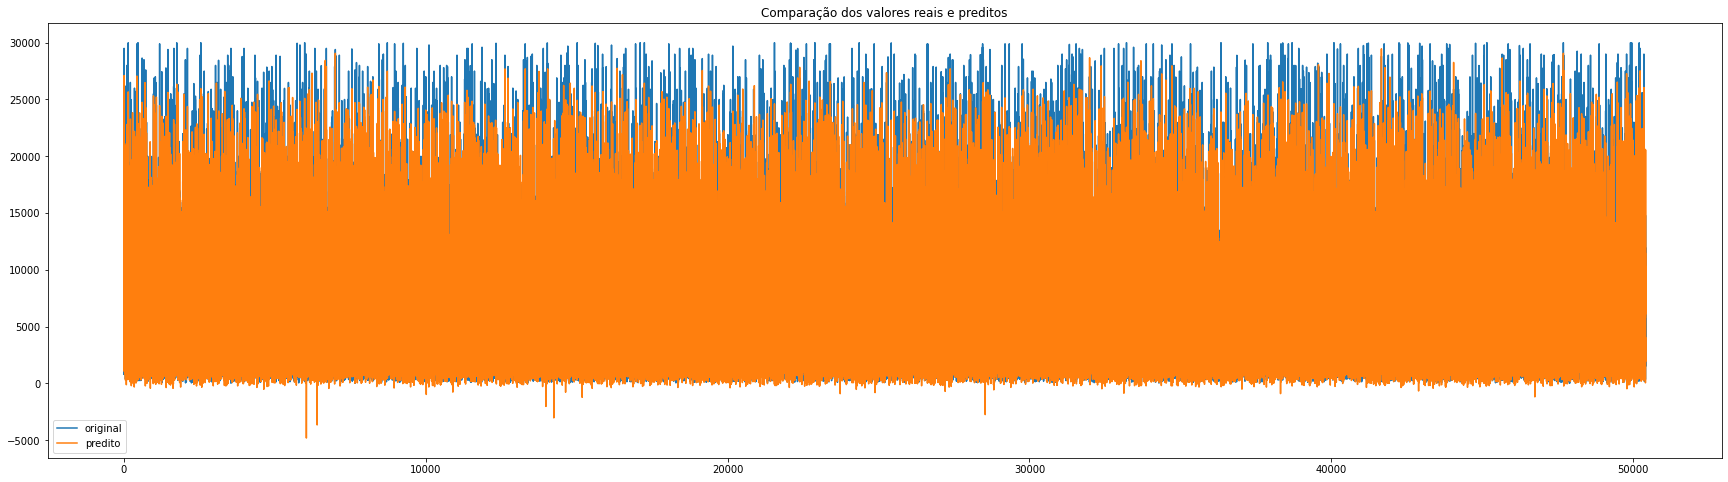

In [ ]:
plt.figure(figsize=(30,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_test_xgbr, label="predito")
plt.title("Comparação dos valores reais e preditos")
plt.legend()
plt.show();

Salvado o estimador...

In [ ]:
import pickle

In [ ]:
with open("auto_grid_xgbr.pkl", "wb") as f:
    pickle.dump(auto_grid_xgbr, f)

In [ ]:
with open("auto_grid_xgbr.pkl", "rb") as f:
    
    auto_grid_xgbr = pickle.load(f)

In [ ]:
y_pred_test_xgbr

array([ 2083.0093,  3053.5046,  1253.2422, ...,  1923.5784, 20567.365 ,
        6139.789 ], dtype=float32)

In [ ]:
y_test.values

array([ 1499,  2300,  1499, ...,  1500, 11950,  7000])

**Vamos criar uma tabela com a porcentagem de acertos para cada dado**

In [ ]:
tabela_xgbr = pd.DataFrame()

In [ ]:
tabela_xgbr["valores reais"] = y_test

In [ ]:
tabela_xgbr["valores preditos"] = y_pred_test_xgbr

In [ ]:
tabela_xgbr["porcentagem de acerto %"]= (y_test/y_pred_test_xgbr)*100

In [ ]:
lista_num = []
for c in tabela_xgbr["porcentagem de acerto %"]:
  if c > 100:
    num = abs(c - 200)
    lista_num.append(num)
  else:
    num = c
    lista_num.append(num)
  

tabela_xgbr["porcentagem de acerto %"]= lista_num

In [ ]:
tabela_xgbr

,valores reais,valores preditos,porcentagem de acerto %
36421,1499,2083.009277,71.963194
207501,2300,3053.504639,75.323285
167062,1499,1253.242188,80.390238
2978,16900,21468.863281,78.718653
227457,999,1217.120972,82.078941
...,...,...,...
100398,4500,4070.799561,89.456606
37105,14800,16393.746094,90.278329
92242,1500,1923.578369,77.979667
154393,11950,20567.365234,58.101754


Salvando a tabela...

In [ ]:
tabela_xgbr.to_csv("06-carros_usados_xgbr.csv")

# **Otimização Bayesiana**



---



---



---



In [16]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV, KFold, train_test_split

from sklearn.pipeline import Pipeline

def pipe_pre_melbourne(drop_not_features=["price"], col_target="price",
                             inputer_num_strategy="mean",
                             encoding="ordinal"):
    '''
    - inputer_num_strategy (str): "mean", "median";
    - encoding (str): "onehot" para OneHotEncoder; "ordinal" OrdinalEncoder;
    '''

    X = df.drop(columns=drop_not_features)
    y = df[col_target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy=inputer_num_strategy)),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    if encoding == "onehot":
    
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        
    elif encoding == "ordinal":
        
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                 unknown_value=-1))])
    
    else:
        
        raise ValueError("Únicos encodings disponíveis são 'ordinal' e 'onehot'")
        
        
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, pre_processador

In [17]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_melbourne(drop_not_features=["price"], 
                                                                            col_target="price",
                                                                            inputer_num_strategy="mean",
                                                                            encoding="ordinal")

In [18]:
from hyperopt import hp, tpe, fmin, Trials, space_eval

In [19]:
hps_space = {"learning_rate" : hp.choice("learning_rate", [0.001, 0.01]),
             "n_estimators" : hp.choice("n_estimators", range(1, 5000)),
             "max_depth" : hp.choice("max_depth", [1, 2, 3]),
             "colsample_bytree": hp.choice("colsample_bytree", [0.1, 0.5, 0.9]),
             "subsample": hp.choice("subsample", [0.1, 0.5, 0.9])}
          

In [20]:
from sklearn.model_selection import cross_validate

In [21]:
def objective(hps_space):
    
    pipe = Pipeline([("pp", pre_processador),
                     ("xgbr", XGBRegressor(**hps_space))])

    # =============================================

    splitter = KFold(n_splits=10, random_state=42, shuffle=True)

    results = cross_validate(pipe,
                             X_train, y_train, 
                             cv=splitter,
                             scoring="r2",
                             n_jobs=-1)

    r2 = results["test_score"].mean()

    return -r2

In [22]:
ts = Trials()

best_hps = fmin(objective,
                space=hps_space,
                algo=tpe.suggest,
                trials=ts,
                max_evals=10)

100%|██████████| 10/10 [2:35:37<00:00, 933.75s/it, best loss: -0.8701844873439883] 


In [23]:
# pré-resposta da otimização
best_hps

{'colsample_bytree': 2,
 'learning_rate': 1,
 'max_depth': 2,
 'n_estimators': 1875,
 'subsample': 2}

In [24]:
# a resposta final, vem com o space_eval
best_hps = space_eval(hps_space, best_hps)
best_hps

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 1876,
 'subsample': 0.9}

In [25]:
XGBRegressor(objective ='reg:squarederror', **best_hps)

XGBRegressor(colsample_bytree=0.9, learning_rate=0.01, n_estimators=1876,
             objective='reg:squarederror', subsample=0.9)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):

    # Predições de treino
    y_pred_train_ob = estimator.predict(X_train)

    print("\nMétricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train_ob):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train_ob):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_ob)):.2f}")

    # Predições de teste
    y_pred_test_ob = estimator.predict(X_test)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test_ob):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test_ob):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_ob)):.2f}") 

In [27]:
pipe = Pipeline([("pp", pre_processador),
                 ("xgbr", XGBRegressor(objective ='reg:squarederror', **best_hps))])

pipe.fit(X_train, y_train)

metricas_classificacao(pipe, X_train, X_test, y_train, y_test)


Métricas de treino:

R^2: 0.87
MAE: 1328.09
RMSE: 2143.79

Métricas de teste:

R^2: 0.87
MAE: 1323.77
RMSE: 2129.61


**Apesar do XGBoost ter dado 88% a Otimização se saiu melhor pois os dados de treino e teste igualaram os valores em 87%**



---



---



---



#**Interpretando o modelo globalmente**

In [28]:
df_mg = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')

In [30]:
df_mg

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


**Retirei algumas outliers, pois alguns dados estão desconexos, exemplo, veículos de 11 milhões de Euros, 99 milhões de Euros, preço abaixo dos 10 Euros, etc.**

In [31]:
df_mg = df_mg[df_mg["price"] > 10]
df_mg = df_mg[df_mg["price"]< 30000]

**Vamos retirar algumas colunas, algumas delas contém 2 tipos de amostras, sendo que um dos tipos só tem 3 amostras, não será válido, por exemplo, a "seller" é dividida em privada e comercial, só existe 3 amostras como comercial. e 371.525 privadas.**

In [33]:
df_mg.drop(columns=["name", "seller", "offerType", "nrOfPictures", "dateCreated", "postalCode"], inplace=True)

In [34]:
df_mg.isna().sum()

dateCrawled                0
price                      0
abtest                     0
vehicleType            33433
yearOfRegistration         0
gearbox                17048
powerPS                    0
model                  17572
kilometer                  0
monthOfRegistration        0
fuelType               29175
brand                      0
notRepairedDamage      65722
lastSeen                   0
dtype: int64

**Vamos transformar as colunas que contém datas para dataTime que são os tipos de dados para datas.**

In [35]:
df_mg["dateCrawled"] = pd.to_datetime(df_mg["dateCrawled"])
df_mg["dateCrawled"].head()

0   2016-03-24 11:52:17
1   2016-03-24 10:58:45
2   2016-03-14 12:52:21
3   2016-03-17 16:54:04
4   2016-03-31 17:25:20
Name: dateCrawled, dtype: datetime64[ns]

In [36]:
df_mg["lastSeen"] = pd.to_datetime(df_mg["lastSeen"])
df_mg["lastSeen"].head()

0   2016-04-07 03:16:57
1   2016-04-07 01:46:50
2   2016-04-05 12:47:46
3   2016-03-17 17:40:17
4   2016-04-06 10:17:21
Name: lastSeen, dtype: datetime64[ns]

Excluindo os valores nulos, são poucos em relação ao número total de dados, não farão falta.

In [37]:
df_mg.dropna(inplace=True)

**O "TimedeltaProperties" não tem atributos de ".day", entãoo vamos transformar em string para depois fazer o slice:**

In [38]:
df_mg.reset_index(inplace=True)
lista_tempo = []
for d in range(len(df_mg)):
  tempo = df_mg["lastSeen"][d] - df_mg["dateCrawled"][d]
  lista_tempo.append(tempo)
df_mg["dayWebsite"] = lista_tempo
df_mg["dayWebsite"]  = df_mg["dayWebsite"].apply(lambda x: str(x)[0])
df_mg.drop(columns=["dateCrawled", "lastSeen"], inplace=True)
df_mg.sort_values(by="dayWebsite", inplace=True)
df_mg.drop(columns="index", inplace=True)
df_mg

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dayWebsite
0,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,0
107379,3999,test,cabrio,1991,manuell,98,golf,150000,3,benzin,volkswagen,nein,0
107381,300,control,kleinwagen,2001,manuell,60,ka,125000,9,benzin,ford,nein,0
107388,2350,control,kleinwagen,2005,manuell,150,fiesta,150000,6,benzin,ford,ja,0
107390,6989,control,kombi,2008,automatik,190,e_klasse,150000,2,diesel,mercedes_benz,nein,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199251,5900,control,bus,2002,manuell,116,galaxy,150000,12,diesel,ford,nein,9
97325,6300,control,cabrio,2004,manuell,166,spider,100000,5,benzin,alfa_romeo,nein,9
67319,8600,test,kleinwagen,2007,manuell,150,polo,90000,11,benzin,volkswagen,nein,9
93210,6500,control,limousine,2012,manuell,86,i_reihe,60000,12,benzin,hyundai,nein,9


In [45]:
df_mg["notRepairedDamage"].value_counts()

nein    225464
ja       26593
Name: notRepairedDamage, dtype: int64

**SHAP**

In [ ]:
!pip install shap
import shap

**O Shap só aceita dados numéricos, vamos transformar as Features categóricas em numéricas.**

**Transformando as Features categóricas em numéricas - OneHotEnconder - Features de dados binários:**

In [52]:
lista_ohe = ["abtest", "gearbox", "notRepairedDamage"]

for i in lista_ohe:  
  ohe =  OneHotEncoder()
  ohe.fit(df_mg[[i]])

  df_mg[i] = ohe.transform(df_mg[[i]]).toarray()

**Transformando as Features categóricas em numéricas - OrdinalEncoder() - Feature com mais de 2 dados diferentes.**

In [56]:
lista_oe = ["vehicleType", "model", "fuelType", "brand"]

for i in lista_oe:  
  oe =  OrdinalEncoder()
  oe.fit(df_mg[[i]])

  df_mg[i] = oe.transform(df_mg[[i]])

**Vamos escalonar todas as Features, pois a amplitude entre os dados está muito grande, isso pode causar um viés no resultado final:**

In [57]:
df_mg.columns

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'dayWebsite'],
      dtype='object')

In [58]:
ssc = StandardScaler()

ssc.fit(df_mg[['abtest', 'vehicleType', 'yearOfRegistration', 'gearbox','powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dayWebsite']])
h= ssc.transform(df_mg[['abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dayWebsite']])
df_mg[['abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dayWebsite']] = h

In [59]:
df_mg

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dayWebsite
0,1500,-0.962922,-0.247037,-0.357551,-0.537309,-0.346068,0.249526,0.640081,-0.057601,-0.688930,1.295242,-0.343435,-1.030161
107379,3999,-0.962922,-1.420455,-1.939053,-0.537309,-0.182282,0.249526,0.640081,-0.923357,-0.688930,1.295242,-0.343435,-1.030161
107381,300,1.038506,-0.247037,-0.357551,-0.537309,-0.452885,0.417550,-0.005344,0.808155,-0.688930,-0.766068,-0.343435,-1.030161
107388,2350,1.038506,-0.247037,0.275049,-0.537309,0.188017,0.053497,0.640081,-0.057601,-0.688930,-0.766068,2.911756,-1.030161
107390,6989,1.038506,0.339672,0.749500,1.861127,0.472862,-0.044518,0.640081,-1.211942,1.159084,-0.002620,-0.343435,-1.030161
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199251,5900,1.038506,-2.007165,-0.199401,-0.537309,-0.054102,0.193517,0.640081,1.673911,1.159084,-0.766068,-0.343435,2.640339
97325,6300,1.038506,-1.420455,0.116899,-0.537309,0.301955,1.551716,-0.650768,-0.346186,-0.688930,-1.529516,-0.343435,2.640339
67319,8600,-0.962922,-0.247037,0.591350,-0.537309,0.188017,1.033640,-0.908938,1.385325,-0.688930,1.295242,-0.343435,2.640339
93210,6500,1.038506,0.926381,1.382100,-0.537309,-0.267736,0.291532,-1.683447,1.673911,-0.688930,-0.613379,-0.343435,2.640339


In [61]:
X = df_mg.drop(columns=["price"])
y = df_mg["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [62]:
xgbr = XGBRegressor(objective ='reg:squarederror').fit(X_train, y_train)

In [63]:
explainer = shap.TreeExplainer(xgbr)

In [ ]:
!pip install git+https://github.com/slundberg/shap.git

In [67]:
shap_vals = explainer.shap_values(X_train, check_additivity=False)

**Temos abaixo as Features que mais impactaram na escolha dos valores preditivos para todos os dados:**

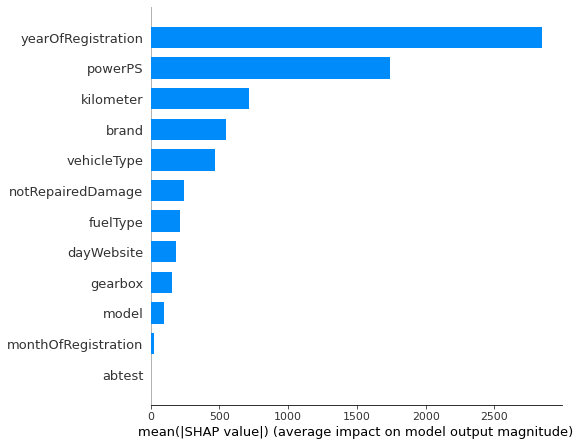

In [68]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")